In [1]:
from initials import *



Logging Resourse Usage - before any initializations
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - before any initializations




2024-09-28 20:16:27,618 - p21960 {initials.py:231} - INFO - Check 1
2024-09-28 20:16:27,622 - p21960 {initials.py:242} - INFO - Check 2
2024-09-28 20:16:27,622 - p21960 {initials.py:248} - INFO - Check 3
2024-09-28 20:16:27,707 - p21960 {initials.py:262} - INFO - Choosen Device : cuda:0
2024-09-28 20:16:27,708 - p21960 {initials.py:269} - INFO - Check 4
2024-09-28 20:16:27,708 - p21960 {initials.py:446} - INFO - Check 6
2024-09-28 20:16:27,708 - p21960 {initials.py:550} - INFO - Check 8
2024-09-28 20:16:27,709 - p21960 {initials.py:601} - INFO - Check 9
2024-09-28 20:16:27,709 - p21960 {initials.py:653} - INFO - Check 10




Logging Resourse Usage - after all library initializations
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - after all library initializations


current process name : MainProcess
CPU Count : 16
GPU 0: 0 MiB / 6144 MiB
Choosen Device : cuda:0


Logging Resourse Usage - end of initials.py
GPU 0: 0 MiB / 6144 MiB
gpu_memory : {0: 0}
initials.py - end of initials.py




In [8]:
mongodb["projects"].delete_many({})

In [11]:
import requests

# Set the URL of the API
url = 'http://localhost:5000/create-project'  # Replace with the actual URL of your API

# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com',
    'project_name': 'Test Project',
    'project_type': 'Image Classification'  # You can change this according to your test case
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.json())

Status Code: 200
Response JSON: {'status': 'fail', 'message': 'Project name already exists!'}


In [12]:
import requests

# Set the URL of the API
url = 'http://localhost:5000/get-project-list'  # Replace with the actual URL of your API

# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com'
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.json())

Status Code: 200
Response JSON: {'status': 'success', 'project_list': [{'_id': '99782a7a-bc27-487f-b472-275724bbfa80_cddc7182', 'project_id': 'cddc7182', 'user_id': '99782a7a-bc27-487f-b472-275724bbfa80', 'project_name': 'Test Project', 'project_type': 'Image Classification', 'project_dir': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project', 'project_creation_time': '2024-09-24 13:08:12.240000', 'project_creation_time_str': '2024-09-24 01:08:12 PM'}]}


In [ ]:

        email = request.form['email']         
        project_name = request.form['project_name']
        data_name =  request.form['data_name']
        data_type = request.form['data_type']
        data_drive_id = request.form['data_drive_id']
        data_zip_file = request.files['data_zip_file']
        

In [52]:
import requests
# Set the URL of the API
url = 'http://localhost:5000/upload-data'  # Replace with the actual URL of your API
# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com',
    'project_name' : 'Test Project',
    'data_name' : 'Test Data 1',
    'data_type' : "Labeled",
    'data_drive_id' : "1TvlMyCitAOOrAwpllcnM1gdi0bAJgXKr", 
    'data_zip_file' : ""
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.content.decode())

Status Code: 200
Response JSON: {"status":"success","data":{"_id":"99782a7a-bc27-487f-b472-275724bbfa80_Test Project_b2a2d49e","data_id":"b2a2d49e","project_name":"Test Project","user_id":"99782a7a-bc27-487f-b472-275724bbfa80","data_name":"Test Data 1","data_type":"Labeled","project_type":"Image Classification","data_zip_path":"workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_b2a2d49e.zip","data_extracted_path":"workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_b2a2d49e_extracted","data_creation_time":"2024-09-24 22:13:35.359280","data_creation_time_str":"2024-09-24 10:13:35 PM"}}


In [51]:
mongodb["datasets"].delete_many({})

In [48]:
import requests
# Set the URL of the API
url = 'http://localhost:5000/get-dataset-list'  # Replace with the actual URL of your API

# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com',
    'project_name' : 'Test Project'
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.content.decode())

Status Code: 200
Response JSON: {"status":"success","dataset_list":[{"_id":"99782a7a-bc27-487f-b472-275724bbfa80_Test Project_9cbf3d39","data_id":"9cbf3d39","project_name":"Test Project","user_id":"99782a7a-bc27-487f-b472-275724bbfa80","data_name":"Test Data","data_type":"Labeled","project_type":"Image Classification","data_zip_path":"workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_9cbf3d39.zip","data_extracted_path":"workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_9cbf3d39_extracted","data_creation_time":"2024-09-24 21:35:56.613000","data_creation_time_str":"2024-09-24 09:35:56 PM"}]}


In [19]:
data_drive_id = "1aGEFw_C5UVJbpWO28fNWlDlWRo5LGiW5"
data_id = uuid.uuid4().__str__()[:8]
file_url = f'https://drive.google.com/uc?id={data_drive_id}'
data_dest_file = os.path.join(f"data_{data_id}.zip")

gdown.download(file_url, data_dest_file)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1aGEFw_C5UVJbpWO28fNWlDlWRo5LGiW5 



In [45]:
data_dest_file = os.path.join('workdir', '99782a7a-bc27-487f-b472-275724bbfa80', 'Test Project', 'data_15daf170.zip')
data_drive_id = "1aGEFw_C5UVJbpWO28fNWlDlWRo5LGiW5"
dest_dir = os.path.dirname(data_dest_file)
file_name = os.path.basename(data_dest_file)
current_dir = os.getcwd()
os.chdir(dest_dir)
os.system(f"gdown --output {file_name} {data_drive_id}")
os.chdir(current_dir)

In [41]:
import requests
# Set the URL of the API
url = 'http://localhost:5000/get-run-logs'  # Replace with the actual URL of your API

# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com',
    'project_name' : 'Test Project'
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.content.decode())

Status Code: 200
Response JSON: {"status":"success","run_history":[{"_id":"665cb16a-09e1-4075-ab2a-4af356f72484","training_start_time":"2024-09-28 20:44:39.488000","training_start_time_str":"2024-09-28 08:44:39 PM","run_name":"RUN1","data_name":"Test Data 2","project_name":"Test Project","user_id":"99782a7a-bc27-487f-b472-275724bbfa80","arch_name":"resnet18","training_mode":"scratch","batch_size":32,"num_epochs":3,"learning_rate":0.01,"training_status":"Epoch 2/3"}]}


In [42]:
import requests
# Set the URL of the API
url = 'http://localhost:5000/get_detailed_training_history'  # Replace with the actual URL of your API

# Define the form data to be sent
data = {
    'email': 'sachin@gmail.com',
    'project_name' : 'Test Project',
    'run_name' : "RUN1"
}

# Send a POST request to the /create-project endpoint
response = requests.post(url, data=data)

# Print the response from the server
print(f'Status Code: {response.status_code}')
print('Response JSON:', response.content.decode())

Status Code: 200
Response JSON: {"status":"success","history":{"epochs":["1/3"],"train_loss":[2.366658988952637],"train_acc":[0.10016],"val_loss":[2.368781241607666],"val_acc":[0.1004]},"classification_report":"Will available after training!"}


In [37]:
email = 'sachin@gmail.com'
project_name = 'Test Project'

user_data = mongodb['users'].find_one({'email' : email})
user_id = user_data["_id"]

run_history = mongodb["run_records"].find({'user_id' : user_id, 'project_name' : project_name})


In [38]:
pd.DataFrame(run_history)

""


In [35]:
run_name = "RUN1"
train_hist = mongodb["training_history"].find_one({"run_name" : run_name, "project_name" : project_name, "user_id" : user_id})

history = train_hist["history"]
classification_report = train_hist["classification_report"]


TypeError: 'NoneType' object is not subscriptable

In [36]:
train_hist

In [25]:
history

{'epochs': ['1/10', '2/10', '3/10'],
 'train_loss': [1.7407714839935302, 1.0161447722816468, 0.7228593872404099],
 'train_acc': [0.36514, 0.63742, 0.74882],
 'val_loss': [1.2477927943229676, 0.973458186674118, 0.6714399291932582],
 'val_acc': [0.534, 0.6557, 0.7659]}

In [26]:
classification_report

'Will available after training!'

In [34]:
mongodb["training_history"].delete_many({})

In [43]:
email = 'sachin@gmail.com'
project_name = 'Test Project'
dataset_list = list(mongodb["datasets"].find({'user_id' : user_id, 'project_name' : project_name}))

In [44]:
dataset_list

[{'_id': '99782a7a-bc27-487f-b472-275724bbfa80_Test Project_b2a2d49e',
  'data_id': 'b2a2d49e',
  'project_name': 'Test Project',
  'user_id': '99782a7a-bc27-487f-b472-275724bbfa80',
  'data_name': 'Test Data 1',
  'data_type': 'Labeled',
  'project_type': 'Image Classification',
  'data_zip_path': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_b2a2d49e.zip',
  'data_extracted_path': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_b2a2d49e_extracted',
  'data_creation_time': datetime.datetime(2024, 9, 24, 22, 13, 35, 359000),
  'data_creation_time_str': '2024-09-24 10:13:35 PM'},
 {'_id': '99782a7a-bc27-487f-b472-275724bbfa80_Test Project_8dc2a4ec',
  'data_id': '8dc2a4ec',
  'project_name': 'Test Project',
  'user_id': '99782a7a-bc27-487f-b472-275724bbfa80',
  'data_name': 'Test Data 2',
  'data_type': 'Labeled',
  'project_type': 'Image Classification',
  'data_zip_path': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_8dc2a4e

In [45]:
data_name = "Test Data 2"
data_info = mongodb["datasets"].find_one({'user_id' : user_id, 'project_name' : project_name, "data_name" : data_name})

In [46]:
data_info

{'_id': '99782a7a-bc27-487f-b472-275724bbfa80_Test Project_8dc2a4ec',
 'data_id': '8dc2a4ec',
 'project_name': 'Test Project',
 'user_id': '99782a7a-bc27-487f-b472-275724bbfa80',
 'data_name': 'Test Data 2',
 'data_type': 'Labeled',
 'project_type': 'Image Classification',
 'data_zip_path': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_8dc2a4ec.zip',
 'data_extracted_path': 'workdir\\99782a7a-bc27-487f-b472-275724bbfa80\\Test Project\\data_8dc2a4ec_extracted',
 'data_creation_time': datetime.datetime(2024, 9, 27, 10, 26, 15, 572000),
 'data_creation_time_str': '2024-09-27 10:26:15 AM'}

In [49]:
os.listdir(data_info["data_extracted_path"])

['train', 'val']

In [56]:
train_dir = os.path.join(data_info["data_extracted_path"], "train")
val_dir = os.path.join(data_info["data_extracted_path"], "val")

assert os.listdir(train_dir) == os.listdir(val_dir)

In [58]:
class_list = os.listdir(train_dir) 

In [129]:
train_total_samples = 0
train_sample_dist = {}
train_sample_paths = {}
for class_name in class_list:
    train_sample_paths[class_name] = [os.path.join(train_dir, class_name, x) for x in os.listdir(os.path.join(train_dir, class_name))]
    train_sample_dist[class_name] = len(train_sample_paths[class_name])
    train_total_samples += train_sample_dist[class_name]
    
val_total_samples = 0
val_sample_dist = {}
val_sample_paths = {}
for class_name in class_list:
    val_sample_paths[class_name] = [os.path.join(val_dir, class_name, x) for x in os.listdir(os.path.join(val_dir, class_name))]
    val_sample_dist[class_name] = len(val_sample_paths[class_name])
    val_total_samples += val_sample_dist[class_name]


In [98]:
train_sample_dist

{'bird': 5000,
 'car': 5000,
 'cat': 5000,
 'deer': 5000,
 'dog': 5000,
 'frog': 5000,
 'horse': 5000,
 'plane': 5000,
 'ship': 5000,
 'truck': 5000}

In [101]:
train_dist =  np.array(list(train_sample_dist.values()))
normalized_entropy(train_dist)

100

In [130]:
val_dist =  np.array(list(val_sample_dist.values()))
normalized_entropy(val_dist)

100

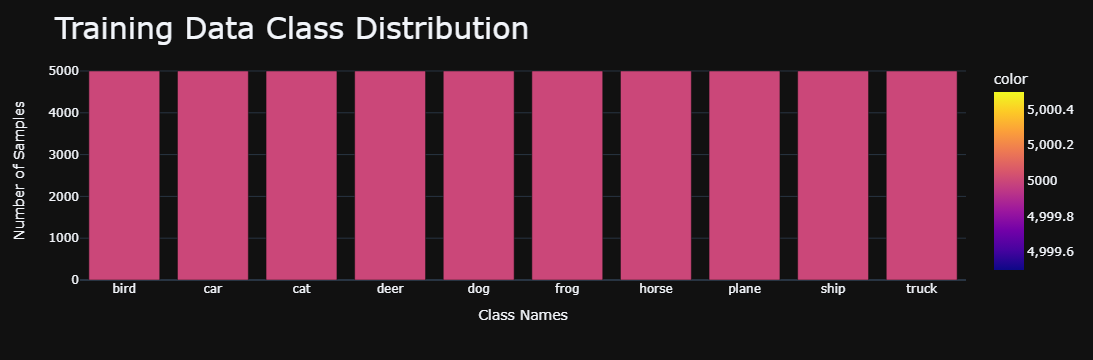

In [128]:

fig = px.bar(x=list(train_sample_dist.keys()), y=list(train_sample_dist.values()),  
             color=list(train_sample_dist.values()))

fig.update_layout(template='plotly_dark',
                    title={'text': f'Training Data Class Distribution', 'font': {'size': 30}, "x" : 0.05, "y" : 0.95}, 
                    yaxis_title=f'Number of Samples', 
                    xaxis_title=f'Class Names')

fig.update_traces(hovertemplate='<b>Number of Samples:</b> %{y}<extra></extra>')

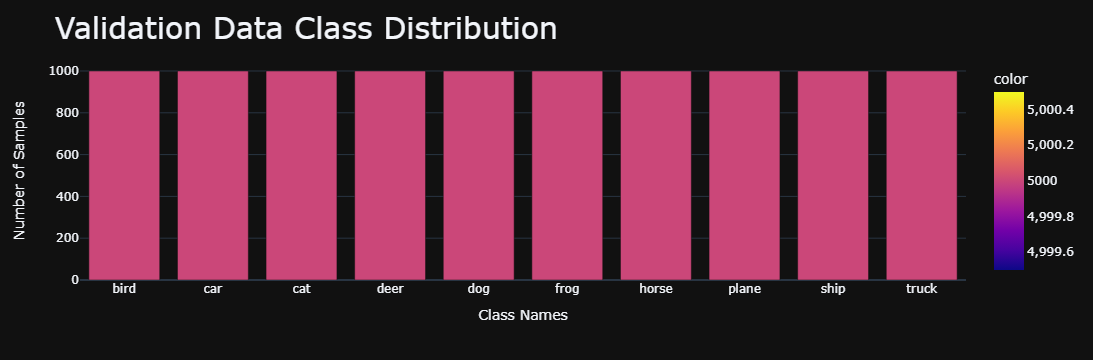

In [131]:

fig = px.bar(x=list(val_sample_dist.keys()), y=list(val_sample_dist.values()),  
             color=list(train_sample_dist.values()))

fig.update_layout(template='plotly_dark',
                    title={'text': f'Validation Data Class Distribution', 'font': {'size': 30}, "x" : 0.05, "y" : 0.95}, 
                    yaxis_title=f'Number of Samples', 
                    xaxis_title=f'Class Names')

fig.update_traces(hovertemplate='<b>Number of Samples:</b> %{y}<extra></extra>')

In [135]:
json.dumps(fig.to_dict(), cls=plotly.utils.PlotlyJSONEncoder)

'{"data": [{"alignmentgroup": "True", "hovertemplate": "<b>Number of Samples:</b> %{y}<extra></extra>", "legendgroup": "", "marker": {"color": [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000], "coloraxis": "coloraxis", "pattern": {"shape": ""}}, "name": "", "offsetgroup": "", "orientation": "v", "showlegend": false, "textposition": "auto", "x": ["bird", "car", "cat", "deer", "dog", "frog", "horse", "plane", "ship", "truck"], "xaxis": "x", "y": [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000], "yaxis": "y", "type": "bar"}], "layout": {"template": {"data": {"barpolar": [{"marker": {"line": {"color": "rgb(17,17,17)", "width": 0.5}, "pattern": {"fillmode": "overlay", "size": 10, "solidity": 0.2}}, "type": "barpolar"}], "bar": [{"error_x": {"color": "#f2f5fa"}, "error_y": {"color": "#f2f5fa"}, "marker": {"line": {"color": "rgb(17,17,17)", "width": 0.5}, "pattern": {"fillmode": "overlay", "size": 10, "solidity": 0.2}}, "type": "bar"}], "carpet": [{"aaxis": {"endlineco

In [118]:
go.layout.Colorscale(sequential=True)

ValueError: 
    Invalid value of type 'builtins.bool' received for the 'sequential' property of layout.colorscale
        Received value: True

    The 'sequential' property is a colorscale and may be
    specified as:
      - A list of colors that will be spaced evenly to create the colorscale.
        Many predefined colorscale lists are included in the sequential, diverging,
        and cyclical modules in the plotly.colors package.
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1),
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].
        Appending '_r' to a named colorscale reverses it.


In [103]:
px.bar(sequential=Tru\\)

ValueError: If using all scalar values, you must pass an index

In [68]:
[5000/5000, 5000/5000, 5000/5000]

[1.0, 1.0, 1.0]

In [69]:
[1000/5000, 10000/5000, 4000/5000]

[0.2, 2.0, 0.8]

In [81]:
dist = np.array([5000, 5000, 5000])
abs(1-(dist / dist.mean())).sum()

0.0

In [82]:
dist = np.array([1000, 10000, 5000])
abs(1-(dist / dist.mean())).sum()

1.75

In [87]:
dist = np.array([500, 1000, 55000])
abs(1-(dist / dist.mean())).sum()

3.84070796460177

In [94]:
import numpy as np

def normalized_entropy(dist):
    # Calculate proportions for each class
    total = np.sum(dist)
    proportions = dist / total
    
    # Shannon entropy
    entropy = -np.sum(proportions * np.log(proportions + 1e-9))  # small epsilon to avoid log(0)
    
    # Normalize by maximum possible entropy (log of number of classes)
    num_classes = len(dist)
    max_entropy = np.log(num_classes)
    
    # Normalized entropy (between 0 and 1)
    return round((entropy / max_entropy) * 100) 

# Example class distributions
dist1 = np.array([5000, 5000, 5000])  # perfectly balanced
dist2 = np.array([4000, 2000, 5000])  # moderately imbalanced
dist3 = np.array([50, 100, 155000])   # highly imbalanced

# Calculate normalized entropy for each distribution
print("Normalized Entropy for dist1:", normalized_entropy(dist1))  # Should be 1
print("Normalized Entropy for dist2:", normalized_entropy(dist2))  # Between 0 and 1
print("Normalized Entropy for dist3:", normalized_entropy(dist3))  # Closer to 0


Normalized Entropy for dist1: 100
Normalized Entropy for dist2: 94
Normalized Entropy for dist3: 1


In [138]:
bool("true")

True

In [141]:
math.ceil(125/25)

5

In [143]:
estimated_time = 620
f"{estimated_time//60}:{estimated_time%60} min"

'10:20 min'

In [153]:
bool()

True